In [7]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [6]:
url='https://www.bankbazaar.com/reviews.html'
page=requests.get(url)
soup=BeautifulSoup(page.text,'html.parser')

#read review text

review_text_elem =soup.find_all(class_='text_here review-desc-more') #used to find all the html tags defined under BS


user_name_elem=soup.find_all(class_='reviewer-profile')
name = []
location = []
Date = []
for i in user_name_elem:
    # print(i.text)
    l=i.text.split(' ')[0]
    name.append(l)
    m = i.text.split(',')[1]
    # print(m)
    g = m.split(' ')[1]
    location.append(g)

    h = m.split('                                    ')[-1]
    Date.append(h)
    
f = soup.find_all(class_="user-review-comment js-individual-title")

title = []
for o in f:
    a_title = o.get('title')
    title.append(a_title)
    # print(a_title)
q = []
for a,b,d,e,f in zip(title,review_text_elem,name,location,Date):
    q.append([a,b.text,d,e,f])
dff = pd.DataFrame(q, columns=['Title', 'Review','name','Location',"Date"])
dff.to_csv("bankbazar.csv")



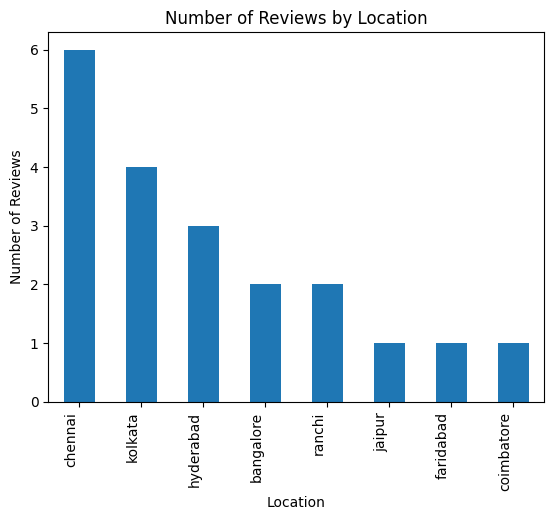

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('bankbazar.csv', index_col=0)

# Create a bar chart of the number of reviews by location
df['Location'].value_counts().plot(kind='bar', rot=90)
plt.xlabel('Location')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Location')
plt.show()



#This bar chart shows that the number of reviews from chennai are greater with compared to the other location 

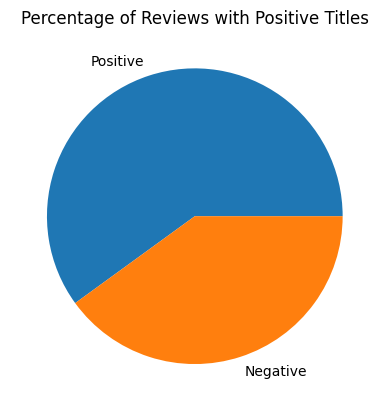

In [11]:
# Create a pie chart of the percentage of reviews with positive titles
positive_titles = df['Title'].str.contains('good|excellent|great|best|amazing', case=False)
positive_percentage = positive_titles.mean() * 100
negative_percentage = 100 - positive_percentage
plt.pie([positive_percentage, negative_percentage], labels=['Positive', 'Negative'])
plt.title('Percentage of Reviews with Positive Titles')
plt.show()


#This pie chart shows that the numbers of positive reviews are greater than compared to negative reviews